# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [3]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [4]:
# Tampilkan 5 baris pertama dengan function head.
# menampilkan semua kolom
pd.set_option('display.max_columns', None)
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 8:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

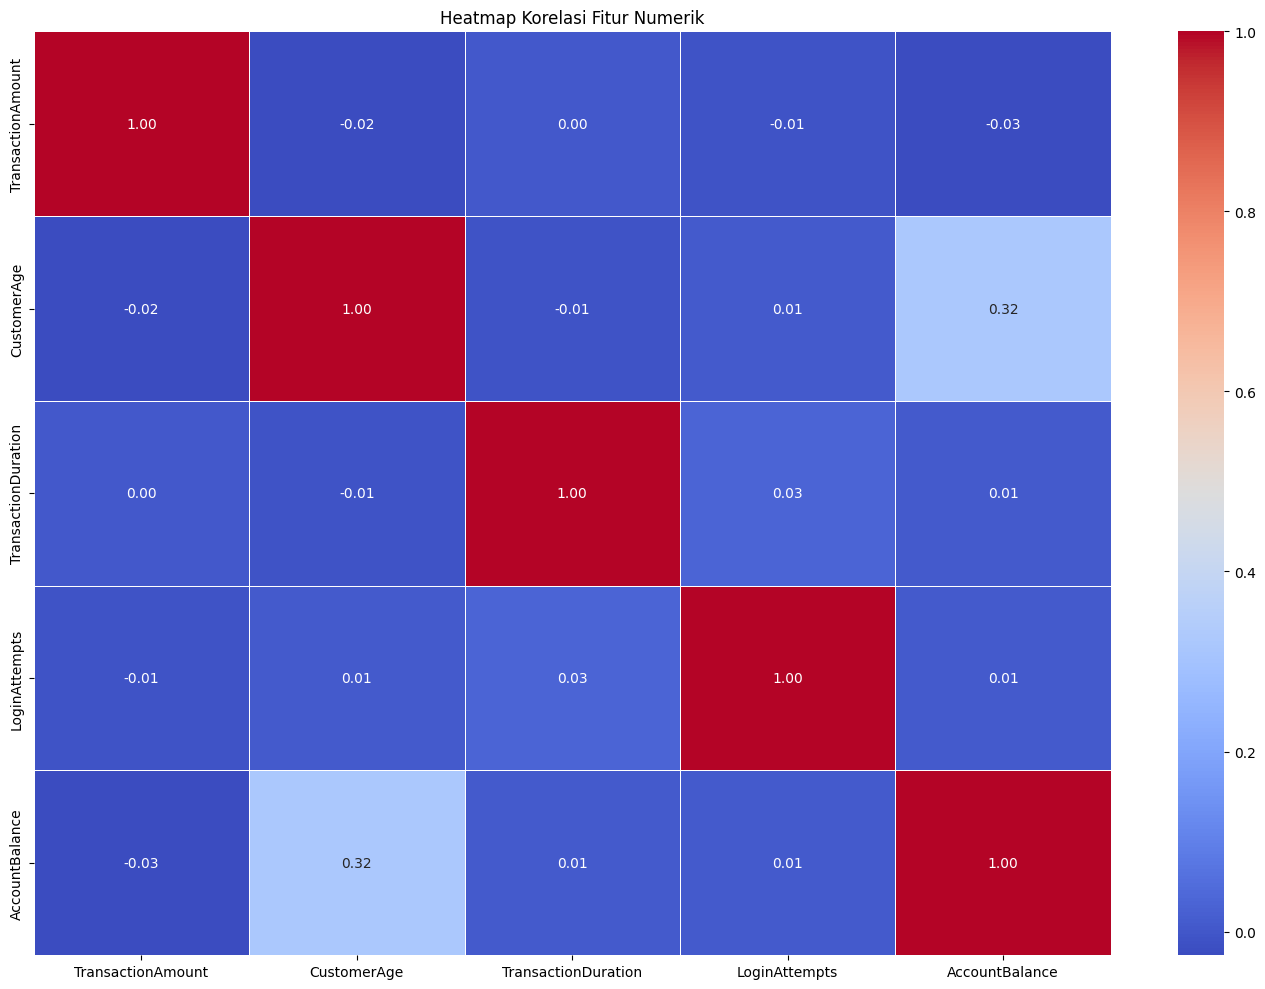

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

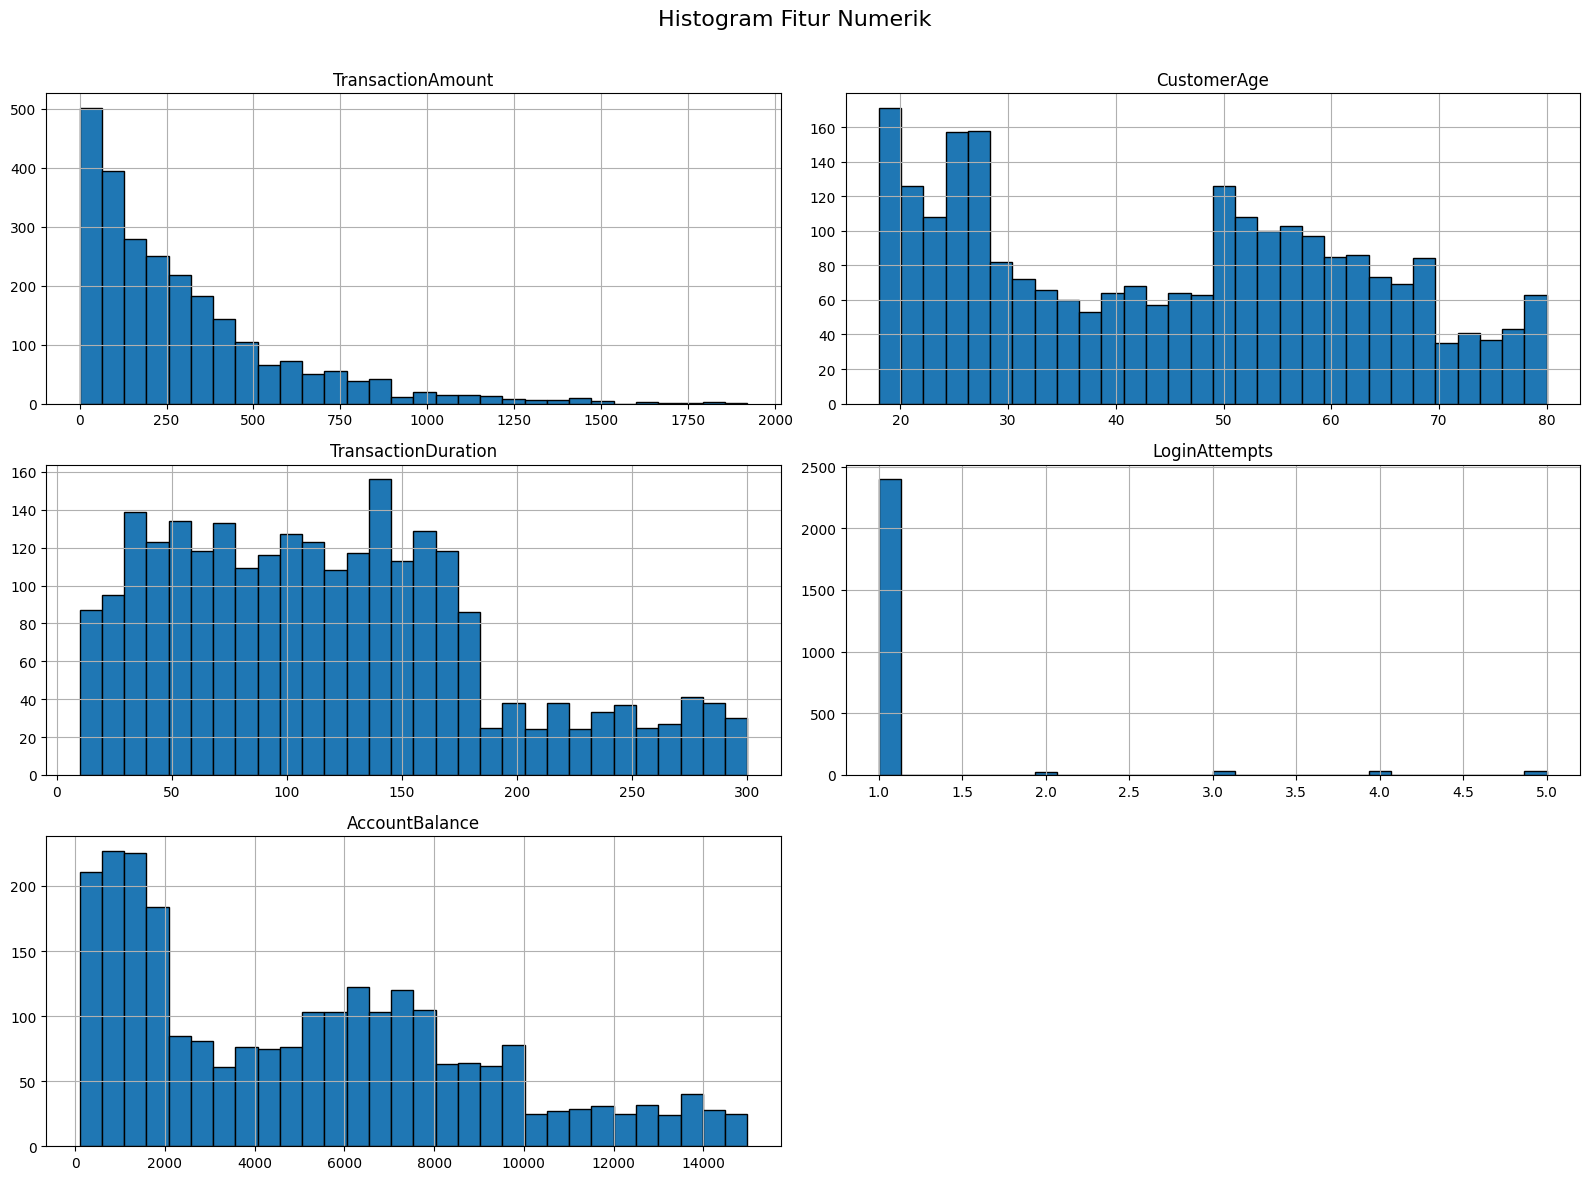

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.suptitle("Histogram Fitur Numerik", fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

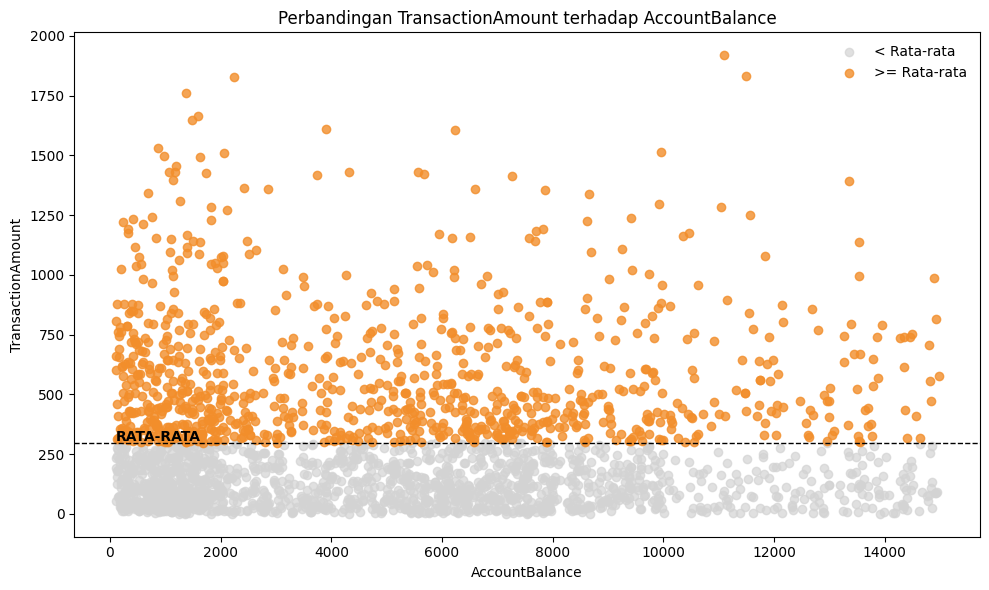

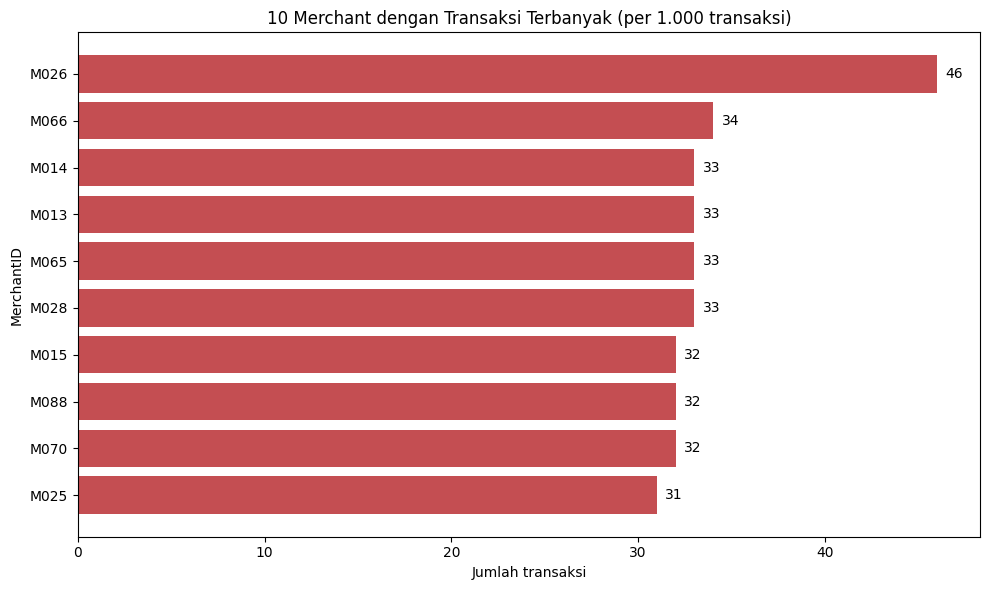

In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Contoh visualisasi gaya business insight dengan highlight dan rangking
if {"TransactionAmount", "AccountBalance"}.issubset(df.columns):
    avg_amount = df["TransactionAmount"].mean()
    high_mask = df["TransactionAmount"] >= avg_amount
    plt.figure(figsize=(10, 6))
    plt.scatter(df.loc[~high_mask, "AccountBalance"], df.loc[~high_mask, "TransactionAmount"],
                color="#D3D3D3", alpha=0.7, label="< Rata-rata")
    plt.scatter(df.loc[high_mask, "AccountBalance"], df.loc[high_mask, "TransactionAmount"],
                color="#F28E2B", alpha=0.8, label=">= Rata-rata")
    plt.axhline(avg_amount, color="black", linestyle="--", linewidth=1)
    plt.text(df["AccountBalance"].min(), avg_amount * 1.02, "RATA-RATA",
             fontweight="bold", color="black")
    plt.title("Perbandingan TransactionAmount terhadap AccountBalance")
    plt.xlabel("AccountBalance")
    plt.ylabel("TransactionAmount")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

if {"MerchantID", "TransactionID"}.issubset(df.columns):
    merchant_issues = df.groupby("MerchantID")["TransactionID"].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(merchant_issues.index[::-1], merchant_issues.values[::-1], color="#C44E52")
    plt.title("10 Merchant dengan Transaksi Terbanyak (per 1.000 transaksi)")
    plt.xlabel("Jumlah transaksi")
    plt.ylabel("MerchantID")
    for bar in bars:
        width = bar.get_width()
        plt.text(width + merchant_issues.max()*0.01, bar.get_y() + bar.get_height()/2,
                 f"{width:,.0f}", va="center")
    plt.tight_layout()
    plt.show()

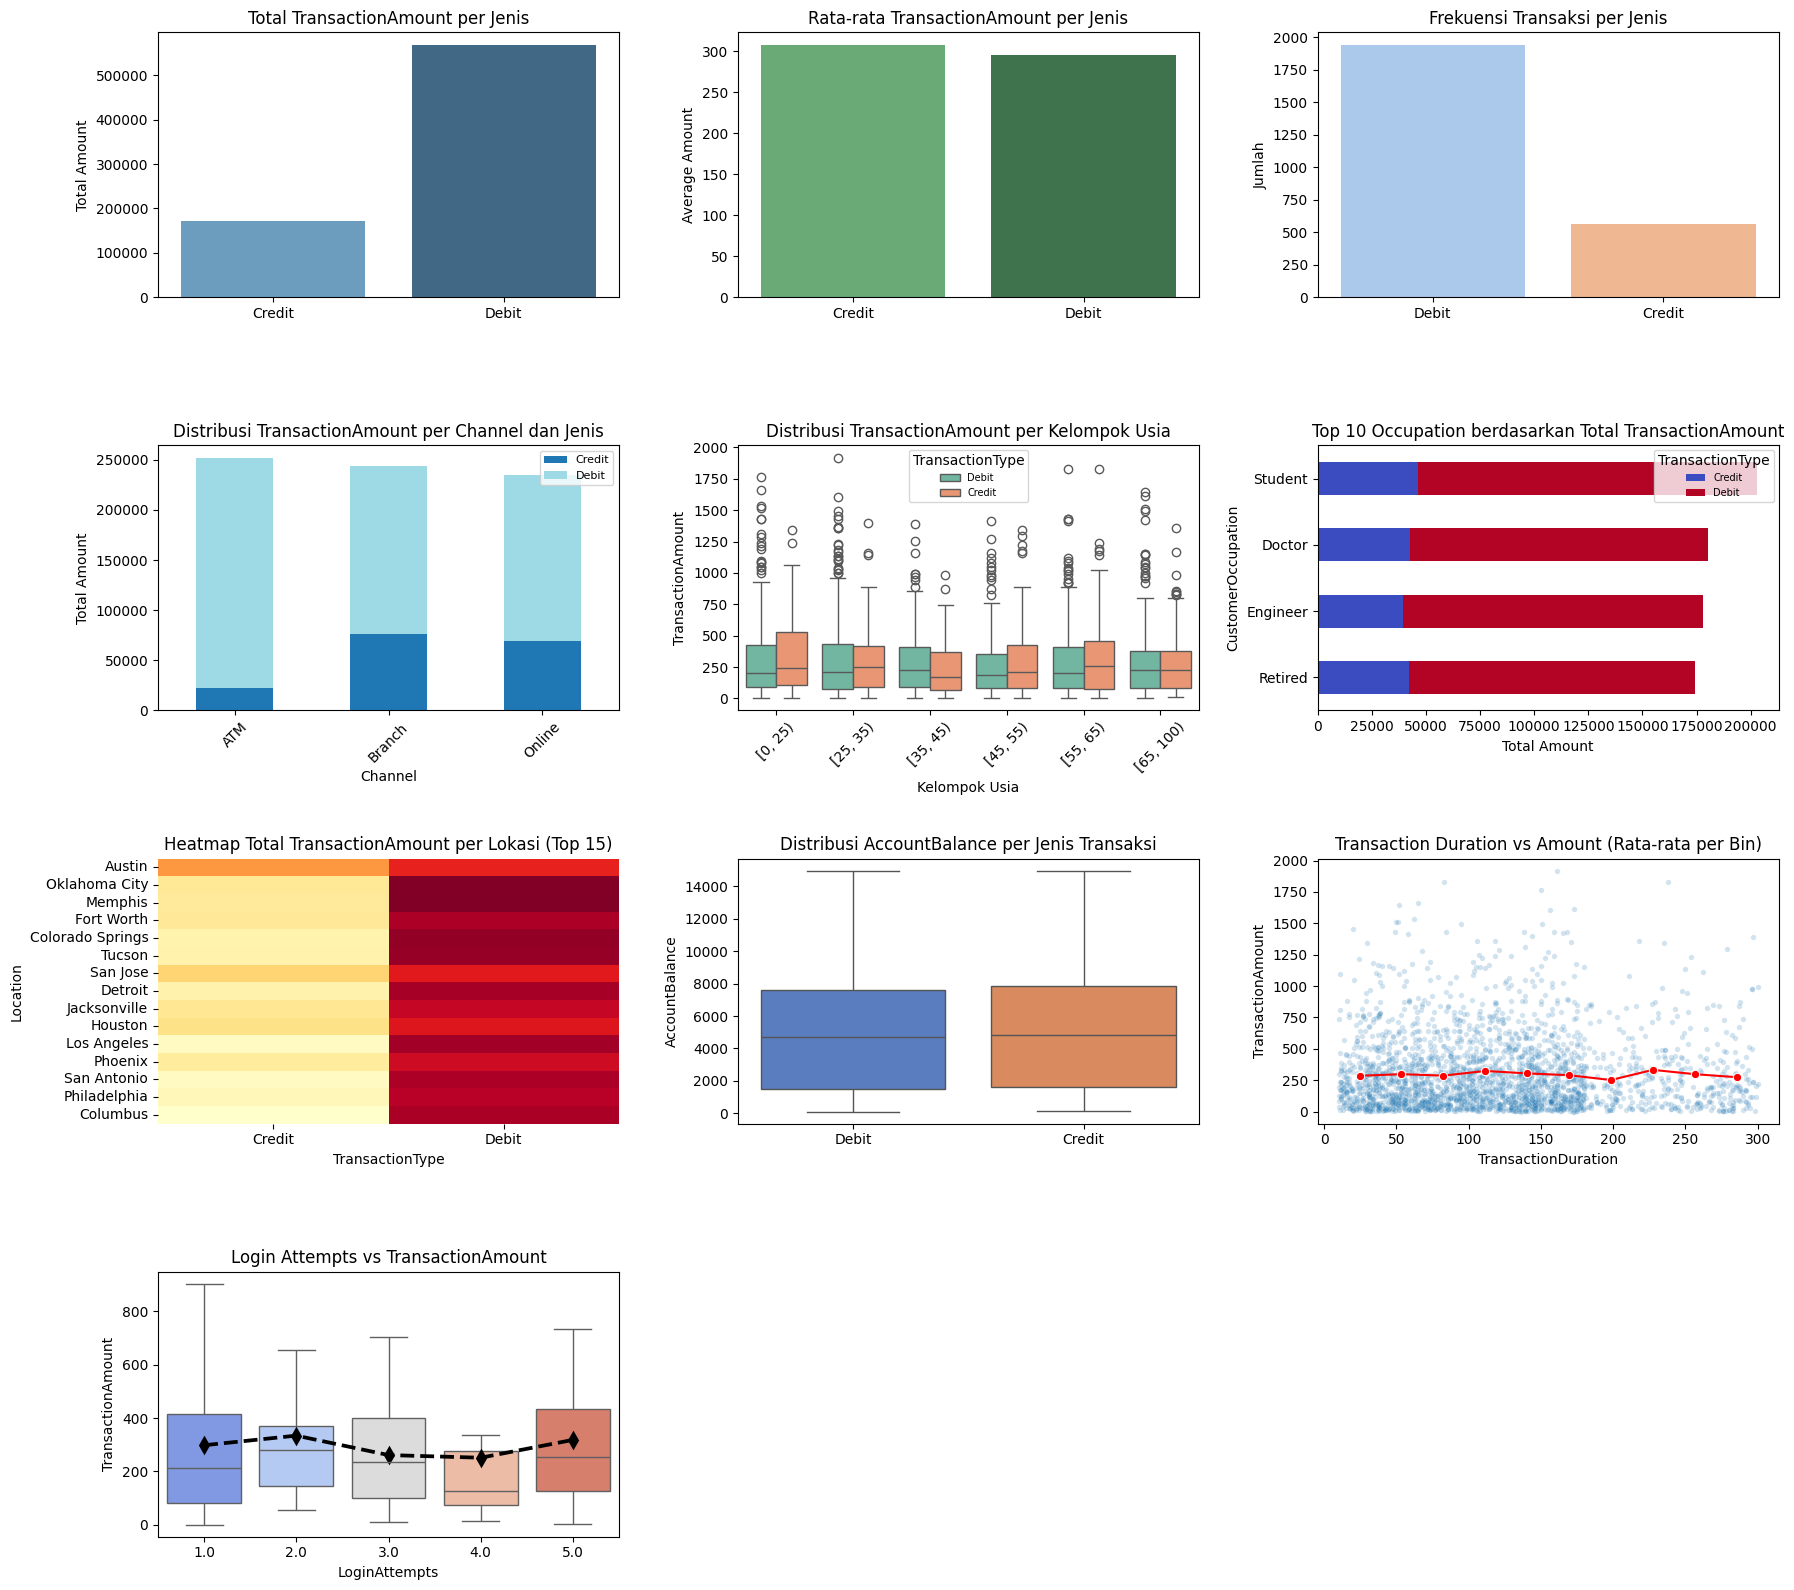

In [10]:
# Visualisasi lanjutan dalam satu grid 4 x N
plots = []

if {"TransactionType", "TransactionAmount"}.issubset(df.columns):
    trans_total = df.groupby("TransactionType")["TransactionAmount"].sum().reset_index()
    def plot_total(ax, data=trans_total):
        sns.barplot(
            data=data,
            x="TransactionType",
            y="TransactionAmount",
            hue="TransactionType",
            palette="Blues_d",
            dodge=False,
            ax=ax
        )
        ax.set_title("Total TransactionAmount per Jenis")
        ax.set_ylabel("Total Amount")
        ax.set_xlabel("")
        legend = ax.get_legend()
        if legend:
            legend.remove()
    plots.append(plot_total)

    trans_mean = df.groupby("TransactionType")["TransactionAmount"].mean().reset_index()
    def plot_mean(ax, data=trans_mean):
        sns.barplot(
            data=data,
            x="TransactionType",
            y="TransactionAmount",
            hue="TransactionType",
            palette="Greens_d",
            dodge=False,
            ax=ax
        )
        ax.set_title("Rata-rata TransactionAmount per Jenis")
        ax.set_ylabel("Average Amount")
        ax.set_xlabel("")
        legend = ax.get_legend()
        if legend:
            legend.remove()
    plots.append(plot_mean)

if "TransactionType" in df.columns:
    def plot_count(ax, data=df):
        order = data["TransactionType"].value_counts().index
        sns.countplot(
            data=data,
            x="TransactionType",
            order=order,
            hue="TransactionType",
            palette="pastel",
            dodge=False,
            ax=ax
        )
        ax.set_title("Frekuensi Transaksi per Jenis")
        ax.set_ylabel("Jumlah")
        ax.set_xlabel("")
        legend = ax.get_legend()
        if legend:
            legend.remove()
    plots.append(plot_count)

if {"Channel", "TransactionType", "TransactionAmount"}.issubset(df.columns):
    channel_summary = df.groupby(["Channel", "TransactionType"])["TransactionAmount"].sum().unstack(fill_value=0)
    if not channel_summary.empty:
        def plot_channel(ax, data=channel_summary):
            data.plot(kind="bar", stacked=True, ax=ax, colormap="tab20")
            ax.set_title("Distribusi TransactionAmount per Channel dan Jenis")
            ax.set_ylabel("Total Amount")
            ax.set_xlabel("Channel")
            ax.legend(loc="upper right", fontsize=8)
            ax.tick_params(axis="x", rotation=45)
        plots.append(plot_channel)

if {"CustomerAge", "TransactionType", "TransactionAmount"}.issubset(df.columns):
    age_df = df.dropna(subset=["CustomerAge", "TransactionType", "TransactionAmount"]).copy()
    if not age_df.empty:
        age_df["AgeBin"] = pd.cut(age_df["CustomerAge"], bins=[0, 25, 35, 45, 55, 65, 100], right=False)
        def plot_age(ax, data=age_df):
            sns.boxplot(
                data=data,
                x="AgeBin",
                y="TransactionAmount",
                hue="TransactionType",
                palette="Set2",
                ax=ax
            )
            ax.set_title("Distribusi TransactionAmount per Kelompok Usia")
            ax.set_xlabel("Kelompok Usia")
            ax.set_ylabel("TransactionAmount")
            ax.tick_params(axis="x", rotation=45)
            ax.legend(fontsize=7, title="TransactionType")
        plots.append(plot_age)

if {"CustomerOccupation", "TransactionType", "TransactionAmount"}.issubset(df.columns):
    occupation_summary = df.groupby(["CustomerOccupation", "TransactionType"])["TransactionAmount"].sum().unstack(fill_value=0)
    if not occupation_summary.empty:
        occupation_top = occupation_summary.sum(axis=1).sort_values(ascending=False).head(10).index
        occupation_filtered = occupation_summary.loc[occupation_top].iloc[::-1]
        def plot_occupation(ax, data=occupation_filtered):
            data.plot(kind="barh", stacked=True, ax=ax, colormap="coolwarm")
            ax.set_title("Top 10 Occupation berdasarkan Total TransactionAmount")
            ax.set_xlabel("Total Amount")
            ax.set_ylabel("CustomerOccupation")
            ax.legend(fontsize=7, title="TransactionType")
        plots.append(plot_occupation)

if {"Location", "TransactionType", "TransactionAmount"}.issubset(df.columns):
    location_summary = df.groupby(["Location", "TransactionType"])["TransactionAmount"].sum().unstack(fill_value=0)
    if not location_summary.empty:
        top_locations = location_summary.sum(axis=1).sort_values(ascending=False).head(15).index
        heatmap_data = location_summary.loc[top_locations]
        def plot_location(ax, data=heatmap_data):
            sns.heatmap(data, cmap="YlOrRd", ax=ax, cbar=False)
            ax.set_title("Heatmap Total TransactionAmount per Lokasi (Top 15)")
            ax.set_xlabel("TransactionType")
            ax.set_ylabel("Location")
        plots.append(plot_location)

if {"AccountBalance", "TransactionType"}.issubset(df.columns):
    balance_df = df.dropna(subset=["AccountBalance", "TransactionType"]).copy()
    if not balance_df.empty:
        def plot_balance(ax, data=balance_df):
            sns.boxplot(
                data=data,
                x="TransactionType",
                y="AccountBalance",
                hue="TransactionType",
                palette="muted",
                dodge=False,
                ax=ax
            )
            ax.set_title("Distribusi AccountBalance per Jenis Transaksi")
            ax.set_ylabel("AccountBalance")
            ax.set_xlabel("")
            legend = ax.get_legend()
            if legend:
                legend.remove()
        plots.append(plot_balance)

if {"TransactionDuration", "TransactionAmount"}.issubset(df.columns):
    duration_df = df.dropna(subset=["TransactionDuration", "TransactionAmount"]).copy()
    if not duration_df.empty:
        duration_bins = np.linspace(duration_df["TransactionDuration"].min(), duration_df["TransactionDuration"].max(), 11)
        duration_df["DurationBin"] = pd.cut(duration_df["TransactionDuration"], bins=duration_bins, include_lowest=True)
        duration_summary = duration_df.groupby("DurationBin", observed=False)["TransactionAmount"].mean().reset_index()
        duration_summary["DurationMid"] = duration_summary["DurationBin"].apply(lambda x: x.mid if pd.notna(x) else np.nan)
        def plot_duration(ax, data=duration_df, summary=duration_summary):
            sns.scatterplot(data=data, x="TransactionDuration", y="TransactionAmount", alpha=0.2, s=15, ax=ax)
            sns.lineplot(
                data=summary.dropna(subset=["DurationMid"]),
                x="DurationMid",
                y="TransactionAmount",
                color="red",
                marker="o",
                ax=ax
            )
            ax.set_title("Transaction Duration vs Amount (Rata-rata per Bin)")
            ax.set_xlabel("TransactionDuration")
            ax.set_ylabel("TransactionAmount")
        plots.append(plot_duration)

if {"LoginAttempts", "TransactionAmount"}.issubset(df.columns):
    login_df = df.dropna(subset=["LoginAttempts", "TransactionAmount"]).copy()
    if not login_df.empty:
        login_summary = login_df.groupby("LoginAttempts")["TransactionAmount"].agg(["mean", "median"]).reset_index()
        def plot_login(ax, data=login_df, summary=login_summary):
            unique_attempts = sorted(data["LoginAttempts"].unique())
            palette_login = dict(zip(unique_attempts, sns.color_palette("coolwarm", len(unique_attempts))))
            sns.boxplot(
                data=data,
                x="LoginAttempts",
                y="TransactionAmount",
                hue="LoginAttempts",
                palette=palette_login,
                dodge=False,
                showfliers=False,
                ax=ax
            )
            sns.pointplot(
                data=summary,
                x="LoginAttempts",
                y="mean",
                color="black",
                ax=ax,
                markers="d",
                linestyles="--"
            )
            ax.set_title("Login Attempts vs TransactionAmount")
            ax.set_xlabel("LoginAttempts")
            ax.set_ylabel("TransactionAmount")
            legend = ax.get_legend()
            if legend:
                legend.remove()
        plots.append(plot_login)



if not plots:
    print("Visualisasi tidak dijalankan karena kolom yang dibutuhkan tidak lengkap.")
else:
    rows = 4
    cols = -(-len(plots) // rows)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else np.array([axes])
    for ax, plot_func in zip(axes_flat, plots):
        plot_func(ax)
    for ax in axes_flat[len(plots):]:
        ax.set_visible(False)
    fig.tight_layout(h_pad=3, w_pad=2)
    plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [12]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [13]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [14]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = [col for col in df.columns if "id" in col.lower() or "ip address" in col.lower()]
df = df.drop(columns=id_cols, errors="ignore")
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [15]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
encoders = {}  # Simpan encoder per kolom untuk opsi inverse di tahap lanjut
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))
    encoders[col] = encoder
df[categorical_cols].head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
0,680,1,36,0,0,105
1,1178,1,15,0,0,192
2,1262,1,23,2,3,41
3,818,1,33,2,3,163
4,1939,0,1,2,3,16


In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    mode_series = df[col].mode()
    if not mode_series.empty:
        df[col] = df[col].fillna(mode_series.iloc[0])
df.isnull().sum()

TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

In [18]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [19]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
before_count = len(df)
mask_non_outlier = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)
df = df[mask_non_outlier]
after_count = len(df)
{"outlier_rows_removed": before_count - after_count, "remaining_rows": after_count}

{'outlier_rows_removed': 787, 'remaining_rows': 1728}

In [20]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
if "encoders" not in globals():
    encoders = {}
features_to_bin = [col for col in ["TransactionAmount", "AccountBalance"] if col in df.columns]
binned_columns = []
for col in features_to_bin:
    bin_col = f"{col}_bin"
    df[bin_col] = pd.qcut(df[col], q=4, labels=False, duplicates="drop")
    encoder = LabelEncoder()
    df[bin_col] = encoder.fit_transform(df[bin_col].astype(str))
    encoders[bin_col] = encoder
    binned_columns.append(bin_col)
df[binned_columns].head() if binned_columns else df.head()

,TransactionAmount_bin,AccountBalance_bin
0,0,2
1,3,3
2,1,0
3,1,3
5,1,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [21]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,AccountBalance_bin
count,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,-0.160290,1241.635995,1.0,21.284722,0.927662,-0.021823,1.531829,-0.006926,-0.204629,-0.007567,181.515046,1.500000,1.500000
std,0.726176,728.090146,0.0,12.367419,0.841855,0.988630,1.150577,1.003844,0.000000,0.979595,103.572664,1.118358,1.118358
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,0.000000,0.000000,0.000000
25%,-0.753388,615.750000,1.0,11.000000,0.000000,-0.991288,1.000000,-0.819572,-0.204629,-0.926891,93.000000,0.750000,0.750000
50%,-0.351921,1234.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.091672,-0.204629,-0.062424,181.000000,1.500000,1.500000
75%,0.230039,1872.250000,1.0,32.000000,2.000000,0.746983,3.000000,0.607683,-0.204629,0.635289,271.000000,2.250000,2.250000
max,2.050618,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-0.204629,2.531190,360.000000,3.000000,3.000000


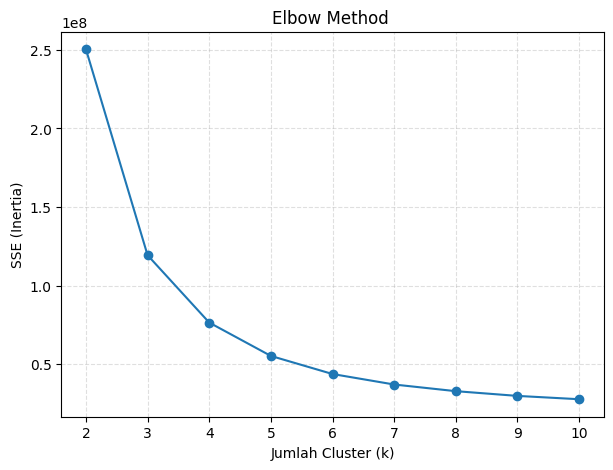

In [22]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.select_dtypes(include=[np.number]).dropna()

inertias = []
k_vals = range(2, 11)

for k in k_vals:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(list(k_vals), inertias, marker='o')
plt.xticks(list(k_vals))
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method ')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [23]:
# Menggunakan algoritma K-Means Clustering
best_k = 4

X = df.select_dtypes(include=[np.number]).dropna()
idx = X.index


model_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = model_kmeans.fit_predict(X)

df.loc[idx, 'Target'] = labels
df['Target'] = df['Target'].astype(int)

df['Target'].value_counts().sort_index()

Target
0    427
1    440
2    427
3    434
Name: count, dtype: int64

Jalankan cell code ini untuk menyimpan model kamu.

In [24]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.4971717676422466

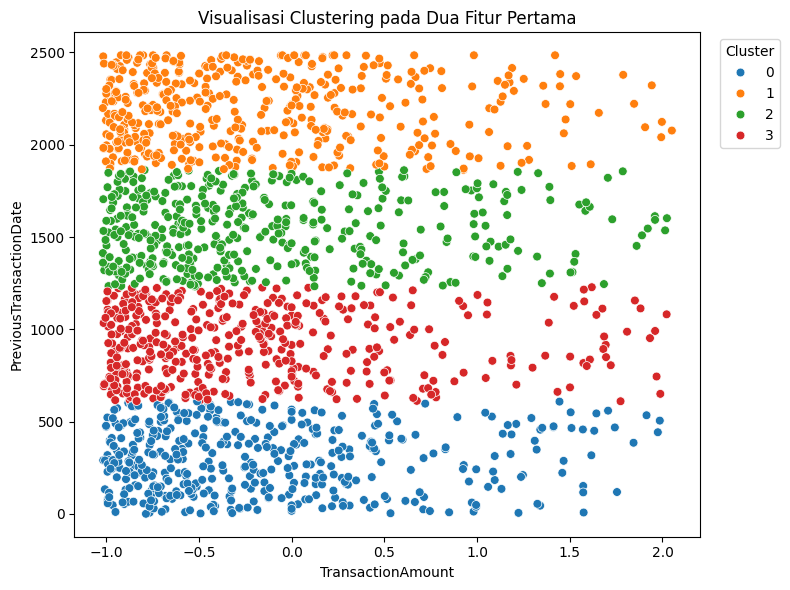

In [26]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 0],
    y=X.iloc[:, 1],
    hue=df.loc[idx, "Target"],
    palette="tab10",
    s=40
)
plt.title("Visualisasi Clustering pada Dua Fitur Pertama")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [27]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
PCA_2 = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"], index=X.index)

model_kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init=10)
model_kmeans_pca.fit(PCA_2)

df.loc[idx, "Target_PCA"] = model_kmeans_pca.labels_
PCA_2.head()

,PCA1,PCA2
0,-561.723703,-75.900170
1,-63.624845,10.589153
2,20.194590,-140.545682
3,-423.654607,-18.054923
5,-606.837368,-167.810970


In [28]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [29]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numeric_features = df.select_dtypes(include=[np.number]).columns
cluster_stats = df.groupby("Target")[numeric_features].agg(["mean", "min", "max"]).round(3)
cluster_stats

TransactionAmount               PreviousTransactionDate              \
                    mean    min    max                    mean   min   max   
Target                                                                       
0                 -0.142 -1.016  1.986                 296.782     0   609   
1                 -0.175 -1.018  2.051                2187.245  1864  2485   
2                 -0.131 -1.018  2.024                1540.028  1232  1863   
3                 -0.192 -1.014  2.022                 918.988   610  1228   

       TransactionType         Location         Channel         CustomerAge  \
                  mean min max     mean min max    mean min max        mean   
Target                                                                        
0                  1.0   1   1   21.354   0  43   0.927   0   3      -0.124   
1                  1.0   1   1   21.736   0  43   0.991   0   3       0.003   
2                  1.0   1   1   20.766   0  43   0.885   0   3      -0.015   
3                  1.0   1   1   21.270   0  43   0.906   0   3       0.047   

                     CustomerOccupation         TransactionDuration         \
          min    max               mean min max                mean    min   
Target                                                                       
0      -1.496  1.981              1.520   0   4              -0.024 -1.562   
1      -1.496  1.981              1.468   0   4              -0.020 -1.562   
2      -1.496  1.981              1.649   0   4               0.030 -1.547   
3      -1.496  1.981              1.493   0   4              -0.013 -1.533   

              LoginAttempts               AccountBalance                \
          max          mean    min    max           mean    min    max   
Target                                                                   
0       2.563        -0.205 -0.205 -0.205         -0.037 -1.286  2.522   
1       2.577        -0.205 -0.205 -0.205          0.071 -1.286  2.531   
2       2.563        -0.205 -0.205 -0.205         -0.042 -1.282  2.481   
3       2.549        -0.205 -0.205 -0.205         -0.024 -1.279  2.512   

       TransactionDate          TransactionAmount_bin          \
                  mean min  max                  mean min max   
Target                                                          
0              184.279   1  360                 1.548   0   3   
1              185.920   0  360                 1.489   0   3   
2              181.012   0  360                 1.548   0   3   
3              174.825   0  360                 1.417   0   3   

       AccountBalance_bin         Target         Target_PCA            
                     mean min max   mean min max       mean  min  max  
Target                                                                 
0                   1.468   0   3    0.0   0   0      0.035  0.0  3.0  
1                   1.584   0   3    1.0   1   1      2.000  2.0  2.0  
2                   1.475   0   3    2.0   2   2      1.007  1.0  2.0  
3                   1.470   0   3    3.0   3   3      2.968  1.0  3.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. Cluster 0: Transaksi kecil, saldo dan binning rendah, mayoritas pada label bin 0–1.
2. Cluster 1: Transaksi terbesar, saldo tinggi, seluruh bin berada di level 1 dan label Target_PCA = 2.
3. Cluster 2: Transaksi menengah, saldo menengah, bin berada di level 2.
4. Cluster 3: Transaksi rendah-menengah, saldo terendah, bin berada di level 3 dan Target_PCA mendekati 3.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [30]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
assert "Target" in df.columns, "Kolom hasil clustering belum dinamai Target."
df["Target"].head()

0    3
1    3
2    2
3    3
5    3
Name: Target, dtype: int64

In [31]:
# Simpan Data
df.to_csv("data_clustering.csv", index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# inverse dataset ke rentang normal untuk numerikal
numeric_cols = list(scaler.feature_names_in_)
df_inverse = df.copy()
df_inverse[numeric_cols] = scaler.inverse_transform(df_inverse[numeric_cols])
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,AccountBalance_bin,Target,Target_PCA
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,0,2,3,3.0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,3,3,3,3.0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1,0,2,1.0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,3,3,3.0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1,0,3,3.0


In [33]:
# inverse dataset yang sudah diencode ke kategori aslinya.
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,AccountBalance_bin,Target,Target_PCA
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,0,2,3,3.0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,3,3,3,3.0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,0,2,1.0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,3,3.0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,0,3,3.0


In [34]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numeric_cols = df_inverse.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_inverse.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_summary = df_inverse.groupby("Target")[numeric_cols].agg(["mean", "min", "max"]).round(3)

if categorical_cols:
    categorical_mode = df_inverse.groupby("Target")[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
else:
    categorical_mode = pd.DataFrame(index=numeric_summary.index)

{"numeric_summary": numeric_summary, "categorical_mode": categorical_mode}

{'numeric_summary':        TransactionAmount               CustomerAge              \
                     mean   min     max        mean   min   max   
 Target                                                           
 0                256.168  0.86  877.81      42.462  18.0  80.0   
 1                246.627  0.26  896.79      44.731  18.0  80.0   
 2                259.370  0.32  889.01      44.408  18.0  80.0   
 3                241.414  1.41  888.57      45.522  18.0  80.0   
 
        TransactionDuration              LoginAttempts            \
                       mean   min    max          mean  min  max   
 Target                                                            
 0                  117.764  10.0  299.0           1.0  1.0  1.0   
 1                  117.992  10.0  300.0           1.0  1.0  1.0   
 2                  121.552  11.0  299.0           1.0  1.0  1.0   
 3                  118.480  12.0  298.0           1.0  1.0  1.0   
 
        AccountBalance          

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. Cluster 0 (ATM – Charlotte – Student): TransactionAmount ≈ 256, AccountBalance ≈ 4.971, usia rata-rata 42; transaksi berdurasi sekitar 118 detik dengan dominasi debit di ATM, cocok untuk nasabah bertransaksi moderat.
2. Cluster 1 (ATM – Tucson – Engineer): TransactionAmount ≈ 247, AccountBalance tertinggi ≈ 5.390 meski rentang transaksi mirip cluster lain; kombinasi saldo tinggi dan profesi engineer menunjukkan segmen bernilai.
3. Cluster 2 (ATM – Denver – Student): TransactionAmount ≈ 259 (tertinggi), AccountBalance ≈ 4.948; meski channel dan tipe mirip, lonjakan amount menandakan potensi transaksi premium dari nasabah muda.
4. Cluster 3 (ATM – Indianapolis – Doctor): TransactionAmount ≈ 241 (terendah) dengan AccountBalance ≈ 5.019; durasi dan saldo stabil menunjukkan nasabah profesional dengan pola transaksi konservatif.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [35]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
cluster_cols = [col for col in ["Target", "Target_PCA"] if col in df.columns]
df_inverse_cluster = df_inverse.copy()
if cluster_cols:
    df_inverse_cluster[cluster_cols] = df[cluster_cols]
df_inverse_cluster.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,AccountBalance_bin,Target,Target_PCA
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,0,2,3,3.0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,3,3,3,3.0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,0,2,1.0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,3,3.0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,0,3,3.0


In [36]:
# Simpan Data
df_inverse_cluster.to_csv("data_clustering_inverse.csv", index=False)

End of Code.